In [1]:
from pymongo import MongoClient
from setting import DB_HOST, DB_PORT, DB_NAME

RM_NAME = 'radiomap_N1_7F_half(ss10)'

In [2]:
import numpy as np

rm = MongoClient(DB_HOST, DB_PORT)[DB_NAME][RM_NAME]
rm_points = np.array([point['coordinate'] for point in rm.find({}, {'_id': 0, 'coordinate': 1})])
rm_points[:, [0, 1]] = rm_points[:, [1, 0]] # x, y coordinate swapping

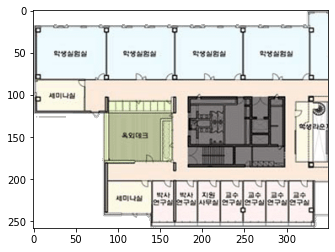

In [3]:
from matplotlib import pyplot as plt
from matplotlib import image as img
floor_map = img.imread('N1_floor_map/7f.png')
floor_map = floor_map[:, :350]
plt.imshow(floor_map)

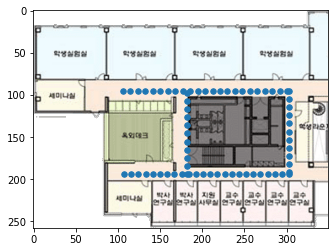

In [4]:
plt.imshow(floor_map)
o_x, o_y = 75, 95
delta = 7.6


xs, ys = [], []

for x, y in rm_points:
    xs.append(o_x + delta * x)
    ys.append(o_y + delta * y)
    
plt.scatter(xs, ys, s=30)
plt.show()
# plt.savefig(RM_NAME + '.png')